<a href="https://colab.research.google.com/github/bharathbolla/ASAG/blob/master/capstone_work_Bharath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the data

In [1]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 7.8 MB 45.1 MB/s 
     |████████████████████████████████| 16.6 MB 68.0 MB/s 


In [3]:
!pip install pygeos


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 4.8 MB/s 


In [4]:
pip install mpl-toolkits.clifford

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 159 kB 5.1 MB/s 
     |████████████████████████████████| 669 kB 59.8 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 


In [5]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install dexplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 173 kB 5.2 MB/s 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dx
import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import csv
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
#from mpl_toolkits.basemap import Basemap
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,\
confusion_matrix,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.feature_extraction import DictVectorizer


In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
!ls

gdrive	sample_data


In [5]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [6]:
!pwd

/content/gdrive/MyDrive


In [7]:
mobile_brand = pd.read_csv('train_mobile_brand.csv')
print("Total mobile brand number entries  : ",mobile_brand.shape[0])
print("Total mobile brand number null val : ",mobile_brand.isnull().sum().sum())
mobile_brand.head(2)

Total mobile brand number entries  :  74840
Total mobile brand number null val :  0


,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote


In [ ]:
#profile = #profileReport(mobile_brand, title="Report")
#profile

In [37]:
event_data = pd.read_csv('train_event_data.csv')
event_data['datetimestamp'] = pd.to_datetime(event_data['datetimestamp'])
print("Total event_data rows  : ",event_data.shape[0])
print("Total event_data number null values : ",event_data.isnull().sum().sum())
event_data.head(2)

Total event_data rows  :  1266933
Total event_data number null values :  205340


,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,33.98,116.79


In [35]:
event_data.isnull().sum()

device_id            0
gender               0
age                  0
group_train          0
event_id         51335
datetimestamp    51335
latitude         51335
longitude        51335
dtype: int64

In [38]:
event_data.latitude.nunique()

2707

In [39]:
event_data.longitude.nunique()

2914

In [ ]:
#profile = #profileReport(event_data, title="Report")
#profile


In [9]:
app_event = pd.read_csv('app_events.csv')
print("Total app_event number entries  : ",app_event.shape[0])
print("Total app_event number null val : ",app_event.isnull().sum().sum())
app_event.head(2)

Total app_event number entries  :  32473067
Total app_event number null val :  0


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0


In [32]:
app_event.event_id.unique()

array([      2,       6,       7, ..., 3252937, 3252946, 3252948])

In [10]:
#profile = #profileReport(app_event, title="Report")
#profile

In [11]:
app_meta = pd.read_csv('app_events_meta_data.csv', encoding='utf-8', quoting=csv.QUOTE_NONE)
app_meta = app_meta.iloc[1: , :]
print("Total app_meta number entries  : ",app_meta.shape[0])
print("Total app_meta number null val : ",app_meta.isnull().sum().sum())

app_meta.head(2)

Total app_meta number entries  :  459943
Total app_meta number null val :  0


,app_id,label_id,category
1,7324884708820027918,251,Finance
2,-4494216993218550286,251,Finance


In [12]:
#profile = #profileReport(app_meta, title="Report")
#profile

### 1.1 EDA, Plots and Data Analysis

#### Age and gender distribution –

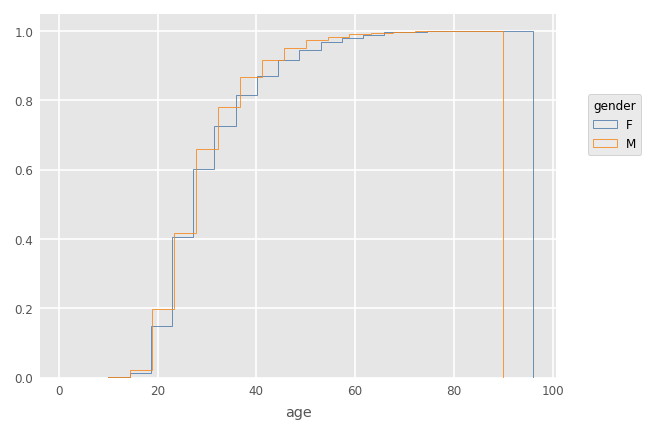

In [13]:
import dexplot as dxp
dxp.hist( val="age",data = mobile_brand,  split='gender', density=True,  histtype='step', cumulative=True)

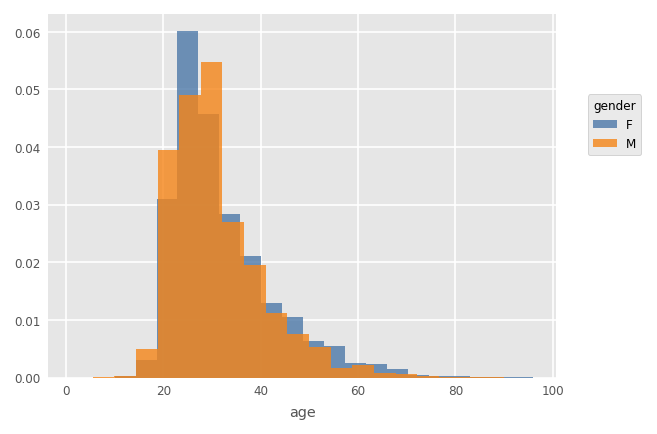

In [14]:
import dexplot as dxp
dxp.hist( val="age",data = mobile_brand,  split='gender', density=True,  )

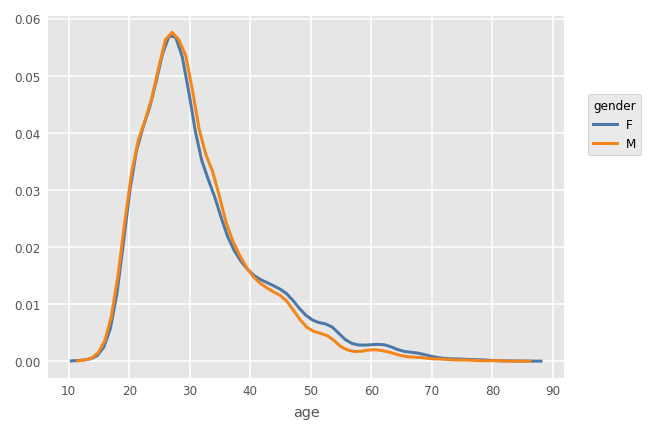

In [15]:
import dexplot as dxp
dxp.kde( x="age",data = mobile_brand,  split='gender'  )

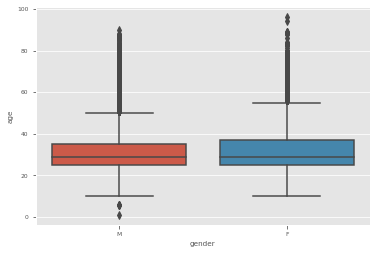

In [16]:
# Boxplot analysis for gender and age (bivariate)

# Median for both Male and Female is almost same, but Male users have higher 75 percentile values.

sns.boxplot(x="gender", y="age", data=mobile_brand) 
plt.show()

95.94808880974763 4.0519111902523655


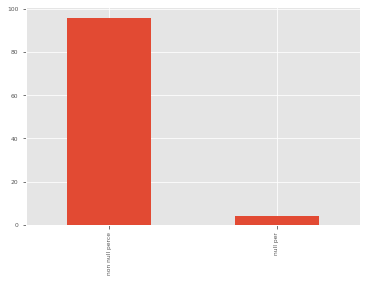

In [17]:
# Plot percentage of device_ids with and without event data 

non_null = event_data['event_id'].notnull().sum()/event_data['event_id'].shape[0]*100
null_val = event_data['event_id'].isnull().sum()/event_data['event_id'].shape[0]*100
print(non_null, null_val)
df = pd.DataFrame({'non null perce' : [non_null], 'null per': [null_val]})
df.sum().plot.bar()
plt.show()

In [18]:
event_data['day'] = event_data['datetimestamp'].dt.weekday
event_data['hour'] = event_data['datetimestamp'].dt.hour
event_data['month'] = event_data['datetimestamp'].dt.month
event_data['day_name'] = event_data['datetimestamp'].dt.day_name()

event_data.head(2)

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude,day,hour,month,day_name
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,33.98,116.79,1.00,15.00,5.00,Tuesday
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,33.98,116.79,1.00,6.00,5.00,Tuesday


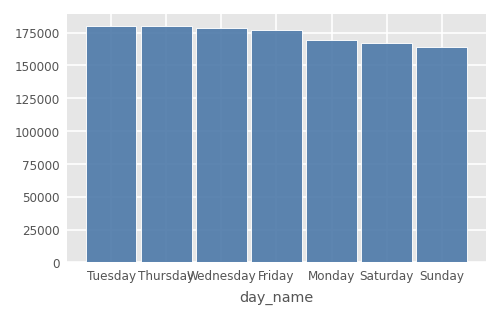

In [19]:
dxp.count(val='day_name', data=event_data)

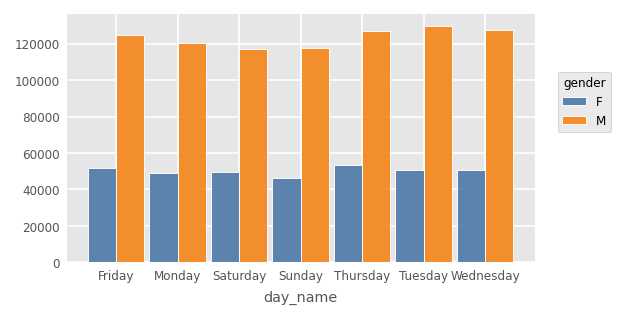

In [20]:
dxp.count(val='day_name', data=event_data, split= 'gender')

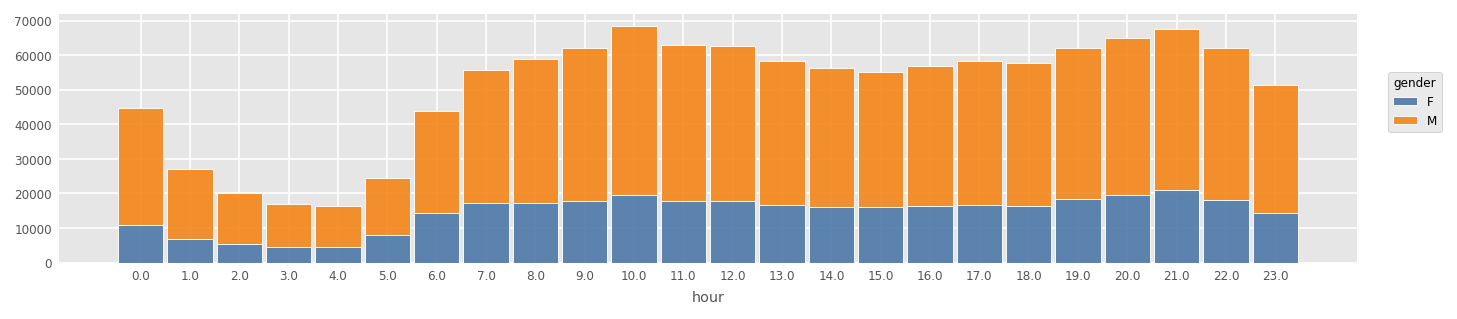

In [21]:
dxp.count(val='hour', data=event_data, split= 'gender', stacked=True)

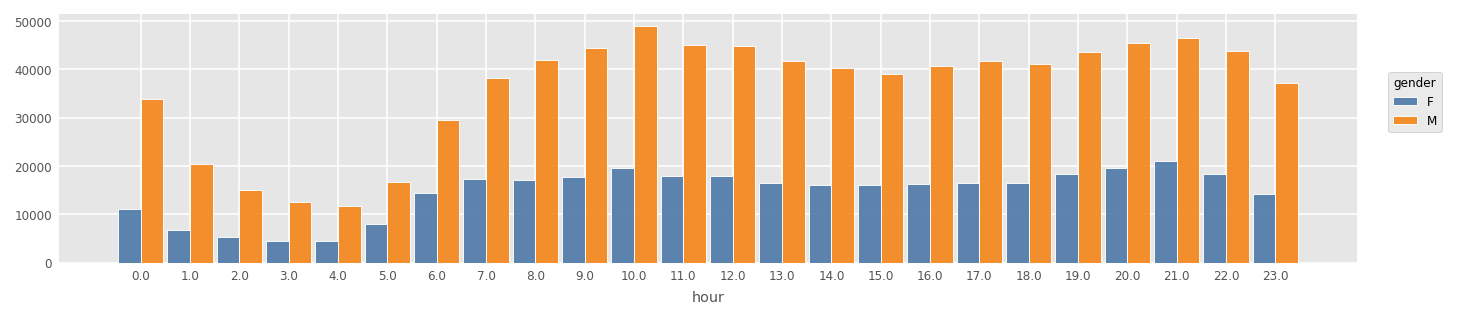

In [22]:
dxp.count(val='hour', data=event_data, split= 'gender')

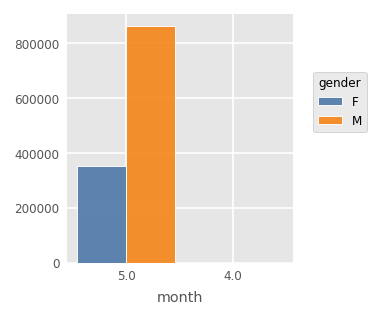

In [23]:
dxp.count(val='month', data=event_data, split= 'gender')

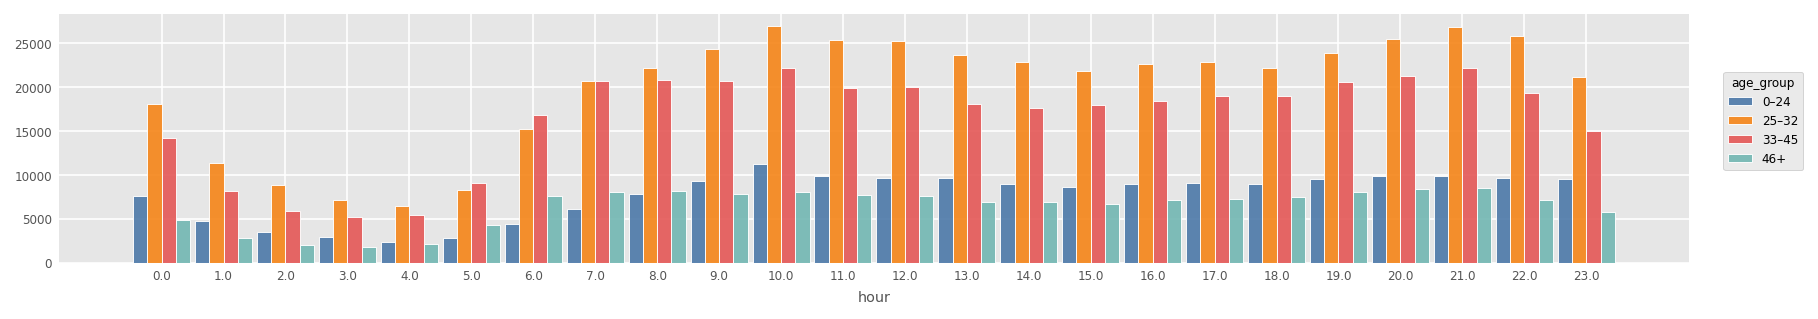

In [24]:
# creating data for different age groups.
event_data['age_group'] = pd.cut(x = event_data['age'], bins=[0,24,32,45,100], \
                                 labels = ['0–24', '25–32', '33–45', '46+'])
dxp.count(val='hour', data=event_data, split= 'age_group')

In [25]:
# Is there any difference in the distribution of events for different age groups over different days of week? 
# (Consider the age groups as 0–24, 25–32, 33–45, 46+]

# creating data for different age groups.
event_data['age_group'] = pd.cut(x = event_data['age'], bins=[0,24,32,45,100], \
                                 labels = ['0–24', '25–32', '33–45', '46+'])

temp = pd.DataFrame(event_data.groupby(['day_name', 'age_group']).size().reset_index(name='count'))

fig = px.bar(temp, x='day_name', y='count', color='age_group')
fig.show()
del temp

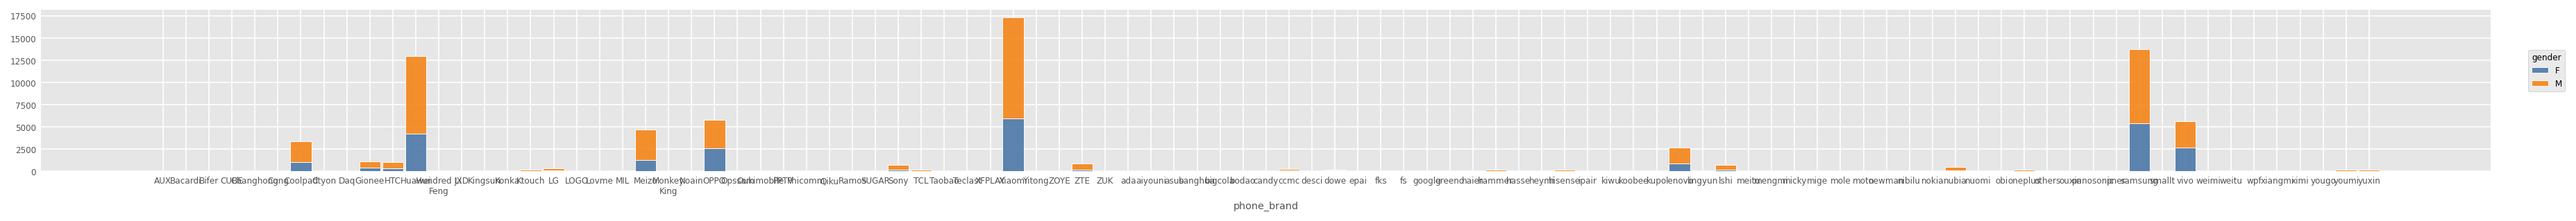

In [26]:
dxp.count(val='phone_brand', data=mobile_brand, split= 'gender', stacked=True)

In [27]:
# Stacked bar chart for the top 10 mobile brands across male and female consumers

temp = pd.DataFrame(mobile_brand.groupby(['phone_brand', 'gender']).size().\
                    sort_values(ascending=False).head(19).reset_index(name='count'))

fig = px.bar(temp, x='phone_brand', y='count', color='gender')
fig.show()
del temp

#### Preparing data for DBSCAN clustering to get the clusters for lattitude and longitude values.

In [28]:
# Merging latitude and longitude values using groupby median with event data
# , as later we will have to merge lot of data frames.

print("observations before group by ", len(event_data))
event_data.dropna(subset=['event_id', 'datetimestamp', 'latitude'], how='all', inplace=True)
temp = event_data.groupby(['device_id','day', 'month']).agg(lat_median=('latitude', 'median'), \
                                                         long_median=('longitude', 'median')).reset_index()

event_data = event_data.merge(temp, on=['device_id', 'day', 'month'], how='left')
print("observations after group by ", len(event_data))
del temp

observations before group by  1266933
observations after group by  1215598


In [29]:
event_data.head(2)

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude,day,hour,month,day_name,age_group,lat_median,long_median
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,33.98,116.79,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,33.98,116.79,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79


In [30]:
# dropping latitude and longitude values as we have median values
event_data.drop(['latitude', 'longitude'], axis = 1, inplace = True) 
event_data.head(2)

,device_id,gender,age,group_train,event_id,datetimestamp,day,hour,month,day_name,age_group,lat_median,long_median
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79


In [33]:
event_data.lat_median.nunique()

3615

#### Applaying DBSCAN to lat and long columns and get the cluster ids




In [ ]:
# Making clusters for lat and long 

temp = event_data[event_data['lat_median'] != 0]
coords = np.asmatrix(temp[['lat_median', 'long_median']].fillna(0))
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps= epsilon, min_samples=1500, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
temp['cluster'] = cluster_labels
temp.head(2)

In [ ]:
event_data = event_data.merge(temp, on=['datetimestamp','event_id','gender','age','group_train'], how='left')
del temp

In [ ]:
event_data.head(2)

In [ ]:
event_data.drop(['device_id_y','day_y','hour_y','month_y','day_name_y','age_group_y','lat_median_y','long_median_y'], \
                axis = 1, inplace = True) 

event_data.rename(columns={"device_id_x": "device_id", "day_x": "day","hour_x": 'hour', 'month_x': \
                           'month', 'day_name_x': 'day_name', 'age_group_x':'age_group','lat_median_x':'lat_median',\
                           'long_median_x':'long_median'}, inplace = True)


In [ ]:
# legth of 0 of lat and long is exactly same as for cluster, hence filling with cluster 68 (new one for 0 lat and long)

print(len(event_data[event_data.cluster.isnull()]))
print(len(event_data[event_data.lat_median == 0]))
event_data['cluster'] = event_data['cluster'].fillna(80)


319611
319611


In [ ]:
event_data.head(2)

,device_id,gender,age,group_train,event_id,datetimestamp,day,hour,month,day_name,age_group,lat_median,long_median,cluster
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79,-1.00
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79,-1.00


In [ ]:
event_data.isnull().sum() * 100 / len(event_data)

device_id       0.00
gender          0.00
age             0.00
group_train     0.00
event_id        0.00
datetimestamp   0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group       0.00
lat_median      0.00
long_median     0.00
cluster         0.00
dtype: float64

In [ ]:
# preparing data for plotting frequent apps representing 10 frequent applications.

merged_event = event_data.merge(mobile_brand, on='device_id', how='left')
print("null count event data  :" ,event_data.isnull().sum().sum())
print("null count after merge :" ,merged_event.isnull().sum().sum())
merged_event.head(2)

null count event data  : 0
null count after merge : 0


,device_id,gender_x,age_x,group_train_x,event_id,datetimestamp,day,hour,month,day_name,age_group,lat_median,long_median,cluster,gender_y,age_y,group_train_y,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,2369465.00,2016-05-03 15:55:35,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C
1,-7548291590301750000,M,33,M32+,1080869.00,2016-05-03 06:07:16,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C


In [ ]:
merged_event.drop(['gender_x', 'age_x', 'group_train_x'], axis = 1, inplace = True) 
merged_event.rename(columns={"gender_y": "gender", "age_y": "age", "group_train_y": "group_train"}, inplace = True)
merged_event.head(2)

,device_id,event_id,datetimestamp,day,hour,month,day_name,age_group,lat_median,long_median,cluster,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,2369465.00,2016-05-03 15:55:35,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C
1,-7548291590301750000,1080869.00,2016-05-03 06:07:16,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C


In [ ]:
merged_event.isnull().sum() * 100 / len(merged_event)

device_id       0.00
event_id        0.00
datetimestamp   0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group       0.00
lat_median      0.00
long_median     0.00
cluster         0.00
gender          0.00
age             0.00
group_train     0.00
phone_brand     0.00
device_model    0.00
dtype: float64

In [ ]:
# is installed always have 1 and no 0, it's not adding any value hence dropping.
app_event.drop(['is_installed'], axis = 1, inplace = True) 
print(len(app_event))
app_event.head(2)

32473067


,event_id,app_id,is_active
0,2,5927333115845830913,1
1,2,-5720078949152207372,0


In [ ]:
app_meta.head(2)
print(len(app_meta))

459943


In [ ]:
# merging app data 
merged_app = app_event.merge(app_meta, on='app_id', how='left')
print("null count app event data  :" ,app_event.isnull().sum().sum())
print("null count app after merge :" ,merged_app.isnull().sum().sum())
merged_app.head(2)

null count app event data  : 0
null count app after merge : 11630274


,event_id,app_id,is_active,label_id,category
0,2,5927333115845830913,1,172,IM
1,2,-5720078949152207372,0,NaN,NaN


In [ ]:
# we have around 9% of null values for category and label_id
merged_app.isnull().sum() * 100 / len(merged_app)

event_id    0.00
app_id      0.00
is_active   0.00
label_id    9.08
category    9.08
dtype: float64

In [ ]:
merged_app['category'].value_counts(normalize = True)

P2P net loan               0.07
Industry tag               0.06
Custom label               0.05
Pay                        0.04
IM                         0.04
                           ... 
Tower Defense              0.00
Guard tower defense game   0.00
game-Leisure time          0.00
Parkour avoid class        0.00
Racing (RAC)               0.00
Name: category, Length: 378, dtype: float64

In [ ]:
# for scenario 1 having all the values is must so dropping category with null values. Filling these 
# NA values with most appearing don't
# makes valid as most of the top categories shares the almost equal distribution.

merged_app = merged_app[merged_app['category'].notna()]
merged_app.isnull().sum() * 100 / len(merged_app)

event_id    0.00
app_id      0.00
is_active   0.00
label_id    0.00
category    0.00
dtype: float64

In [ ]:
# merging both mobile and app data as a final dataset
final_merge_df = merged_event.merge(merged_app, on='event_id', how='left')
print("after merge length of dataset : ", len(final_merge_df))
final_merge_df.head(2)

after merge length of dataset :  22665187


,device_id,event_id,datetimestamp,day,hour,month,day_name,age_group,lat_median,long_median,cluster,gender,age,group_train,phone_brand,device_model,app_id,is_active,label_id,category
0,-7548291590301750000,2369465.00,2016-05-03 15:55:35,1.00,15.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C,NaN,NaN,NaN,NaN
1,-7548291590301750000,1080869.00,2016-05-03 06:07:16,1.00,6.00,5.00,Tuesday,33–45,33.98,116.79,-1.00,M,33,M32+,Huawei,è£è€€3C,NaN,NaN,NaN,NaN


In [ ]:
final_merge_df.isnull().sum() * 100 / len(final_merge_df)

device_id       0.00
event_id        0.00
datetimestamp   0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group       0.00
lat_median      0.00
long_median     0.00
cluster         0.00
gender          0.00
age             0.00
group_train     0.00
phone_brand     0.00
device_model    0.00
app_id          3.00
is_active       3.00
label_id        3.00
category        3.00
dtype: float64

In [ ]:
final_merge_df = final_merge_df[final_merge_df['category'].notna()]
print("total count ",len(final_merge_df))
final_merge_df.isnull().sum() * 100 / len(final_merge_df)

total count  21985167


device_id       0.00
event_id        0.00
datetimestamp   0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group       0.00
lat_median      0.00
long_median     0.00
cluster         0.00
gender          0.00
age             0.00
group_train     0.00
phone_brand     0.00
device_model    0.00
app_id          0.00
is_active       0.00
label_id        0.00
category        0.00
dtype: float64

In [ ]:
print("final merge data                   : ", len(final_merge_df))
print("Total mobile brand number entries  : ",mobile_brand.shape[0])
print("Total event_data number entries    : ",event_data.shape[0])
print("Total app_event number entries     : ",app_event.shape[0])
print("Total app_meta number entries      : ",app_meta.shape[0])


final merge data                   :  21985167
Total mobile brand number entries  :  74840
Total event_data number entries    :  1215598
Total app_event number entries     :  32473067
Total app_meta number entries      :  459943


In [ ]:
# Chart representing 10 frequent applications and the corresponding percentage of male and female consumers

temp = final_merge_df.loc[final_merge_df.is_active.notnull()]
temp1 = temp.groupby(['app_id']).size().\
        sort_values(ascending=False).head(10).reset_index(name='count')

temp2 = temp[temp['app_id'].isin(temp1['app_id'].tolist())]
temp_m = temp2[temp2['gender']=='M'].groupby(['app_id']).size().reset_index(name='m_count')
temp_f = temp2[temp2['gender']=='F'].groupby(['app_id']).size().reset_index(name='f_count')

data_frames = [temp1, temp_m, temp_f]
from functools import reduce

df_plot = reduce(lambda  left,right: pd.merge(left,right,on=['app_id'],
                                            how='outer'), data_frames)

df_plot = df_plot.sort_values(by=['count'], ascending = False)
df_plot['app_id'] = df_plot['app_id'].astype(str)
df_plot

del temp
del temp1
del temp2
del temp_m
del temp_f

In [ ]:
fig = px.bar(
    data_frame = df_plot,
    x = "app_id",
    y = ['count', 'm_count', 'f_count'],
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    title='representing 10 frequent applications',
)

fig.show()
del df_plot

In [ ]:
# Top 10 mobile phone brands by age groups (Consider the age groups as 0–24, 25–32, 33–45, 46+.)

temp = pd.DataFrame(final_merge_df.groupby('phone_brand').size().sort_values(ascending=False).\
                    head(10).reset_index(name='popularity'))
fig = px.bar(temp, x='phone_brand', y='popularity')
fig.show()
del temp

### 1.2 Feature Engineering 


In [ ]:
final_merge_df.dropna(subset=['event_id', 'datetimestamp'], how='all', inplace=True)
print("total count : ",len(final_merge_df))
final_merge_df.isnull().sum() * 100 / len(final_merge_df)

total count :  21985167


device_id       0.00
event_id        0.00
datetimestamp   0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group       0.00
lat_median      0.00
long_median     0.00
cluster         0.00
gender          0.00
age             0.00
group_train     0.00
phone_brand     0.00
device_model    0.00
app_id          0.00
is_active       0.00
label_id        0.00
category        0.00
dtype: float64

In [ ]:
print(final_merge_df['category'].value_counts(normalize = True))

P2P net loan               0.07
Industry tag               0.06
Custom label               0.05
Pay                        0.05
IM                         0.04
                           ... 
game-game type             0.00
Senki                      0.00
Guard tower defense game   0.00
Harem                      0.00
Martial arts               0.00
Name: category, Length: 368, dtype: float64


In [ ]:
final_merge_df.groupby(['device_id','day', 'month'])["is_active"].count()

device_id             day   month
-9222956879900150000  4.00  5.00     2165
                      5.00  5.00     2988
-9221026417907250000  0.00  5.00      211
                      1.00  5.00      201
                      2.00  5.00      195
                                     ... 
 9220914901466450000  2.00  5.00      194
                      3.00  5.00      243
                      4.00  5.00       47
                      5.00  5.00       49
                      6.00  5.00      427
Name: is_active, Length: 96106, dtype: int64

#### P.S :  Below code is for active events per day, after having the data for each row and needed to merge the data for one more time, python kernel was crahsing, hence although code is working, due to computations issue. not using this code.


In [ ]:

temp = final_merge_df.groupby(['device_id','day', 'month'])['is_active']\
.apply(lambda x: (x==1).sum()).reset_index(name='is_active_count')
print(len(temp))
temp1 = final_merge_df.groupby(['device_id','day', 'month'])["is_active"].count().reset_index(name='total_count')
temp2 = temp.merge(temp1, on='device_id', how='inner')
temp2.drop(['day_x', 'month_x'], axis = 1, inplace = True) 
temp2.rename(columns={"day_y": "day", "month_y": "month"}, inplace = True)
temp2['perce_active_day'] = temp2['is_active_count']/temp2['total_count']

final_merge_df = final_merge_df.merge(temp2, on=['device_id', 'day', 'month'], how='inner')
final_merge_df.head(2)
del temp
del temp2
del temp1


96106


In [ ]:
final_merge_df.head(2)

In [ ]:
# Plot the visualization plot for a sample of 1 lakh data points.

temp = event_data.sample(n=100000)
plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0,resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')

mxy = m1(temp['long_median'].tolist(), temp['lat_median'].tolist()) 
m1.scatter(mxy[0], mxy[1], s=3, c='#1292db', lw=0, alpha=1, zorder=5)
plt.title('Overall View of Events')
plt.show()

del temp
del m1

In [ ]:
# Compare the event visualization plots based on the users' gender information. (This can be done on the 
# sample of 1 lakh data points.)

colors = ['tab:red', 'tab:green']
#colors = ListedColormap(['red', 'green'])

gender = ['F', 'M']

temp = event_data.sample(n=100000)
plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0,resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')
i=0
for g in gender:
    temp1 = temp[temp['gender'] == g]
    mxy = m1(temp1['long_median'].tolist(), temp1['lat_median'].tolist())
    scatter = m1.scatter(mxy[0], mxy[1], s=3, c=colors[i] , lw=0, alpha=1, zorder=5, label= g)
    #scatter = m1.scatter(mxy[0], mxy[1], s=3, c= mxy[2].map(colors), cmap=colors, lw=0, alpha=1, zorder=5)
    i+=1
    

plt.title('Gender based view of Events')
plt.legend(loc='lower left');


#handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
#ax.legend(title='Gender based view of Events', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
del temp
del temp1
del m1

In [ ]:
# Compare the event visualization plots based on the following age groups:0–24 , 25–32 and 32+

temp = event_data.sample(n=100000)
temp['age_group'] = pd.cut(x = temp['age'], bins=[0,24,31,100], \
                                 labels = ['0–24', '25–32', '32+'])

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = [ '0–24','25–32', '32+']

plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0, resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')
i=0
for label in labels:
    temp1 = temp[temp['age_group'] == label]
    mxy = m1(temp['long_median'].tolist(), temp['lat_median'].tolist())
    scatter = m1.scatter(mxy[0], mxy[1], s=1, c= colors[i], alpha=1, zorder=1, label= label)
    i+=1
#scatter = m1.scatter(mxy[0], mxy[1], s=3, c= mxy[2].map(colors), cmap=colors, lw=0, alpha=1, zorder=5)

plt.title('Age Group based view of Events')

plt.legend(loc='lower left');

plt.show()
del temp
del temp1
del m1

In [ ]:
print(len(final_merge_df))


In [ ]:
# dropping the duplicates rows, as the same rows with same data would act as a noise and will not bring any value. 

final_merge_df = final_merge_df.drop_duplicates(subset=['device_id', 'app_id', 'category', 'gender', 'age', 'phone_brand', \
                                                        'lat_median', 'long_median'], keep='first')


In [ ]:
print(len(final_merge_df))
final_merge_df.tail(2)

In [ ]:
train_test_split = pd.read_csv('train_test_split.csv')

In [ ]:
final_merge_df.dtypes

In [ ]:
final_merge_df['device_id'] = final_merge_df['device_id'].astype('int64')
final_merge_df['device_id'].dtype

In [ ]:
train_test_split.dtypes

In [ ]:
train_test_split.head(2)

In [ ]:
train_test_split['gender'] = train_test_split['gender'].map({'M': 1,'F': 0})

In [ ]:
train_test_split.dtypes

In [ ]:
# using given file for train test split.
print(len(train_test_split))
final_merge_df = final_merge_df.merge(train_test_split, on=['device_id', 'gender', 'age'], how='left')
final_merge_df.head(2)

####  preparing data for modeling.


In [ ]:
# Columns that are dropping and reason.
# event_id: This is specific to each event and it will be unique. For any new coming data this will not add any value.
# datetimestamp ['day', 'month']: The hour and day name have captured the details
# group_train, age, age_group : Directly or indirectly these columns is what we need to predict.
# lat_median, long_median : Data for this is captured in cluster

dic = {'0-24': 0, '25-32': 1, '32+': 2}
final_merge_df['gender'] = final_merge_df.gender.map(dict(M=1, F=0))
final_merge_df['age_group_out'] = pd.cut(x = final_merge_df['age'], bins=[0,24,31,100], \
                                 labels = ['0-24', '25-32', '32+'])
final_merge_df['age_group_out'] = final_merge_df.age_group_out.map(dic)

final_merge_df.drop(['event_id', 'datetimestamp', 'day', 'month', 'group_train', 'age','age_group',\
                    'group', 'lat_median', 'long_median'], axis = 1, inplace = True) 
final_merge_df.head(2)

,device_id,hour,day_name,cluster,gender,phone_brand,device_model,app_id,is_active,label_id,category,age_group_out,is_active_count,total_count,perce_active_day,train_test_flag
0,-7548291590301750000,10.00,Sunday,-1.00,NaN,Huawei,è£è€€3C,9112463114311278255,0.00,179,video,2,4,5,0.80,train
1,-7548291590301750000,10.00,Sunday,-1.00,NaN,Huawei,è£è€€3C,8693964245073640147,1.00,172,IM,2,4,5,0.80,train


In [ ]:
final_merge_df['age_group_out'].unique()

[2, 0, 1]
Categories (3, int64): [0 < 1 < 2]

#### Please See: huge data not able to process, hence taking 10% of the data for modeling. Tried will full data at first both XGboost and stacking is failing to run


In [ ]:

print("Before sample size : ", len(final_merge_df))
final_merge_df = final_merge_df.sample(n=int((len(final_merge_df)/100)*10), random_state=42, replace=False)
print("After sample size  : ", len(final_merge_df))


Before sample size :  2576350
After sample size  :  257635


#### Train data preperation

In [ ]:
xtrain = final_merge_df[final_merge_df['train_test_flag']=='train']
ytrain_gen = xtrain['gender']
ytrain_age = xtrain['age_group_out']
print(xtrain['train_test_flag'].unique())
xtrain.drop(['gender','age_group_out', 'train_test_flag'], axis = 1, inplace = True) 
print(len(xtrain))
xtrain.head(2)

['train']
192846


,device_id,hour,day_name,cluster,phone_brand,device_model,app_id,is_active,label_id,category,is_active_count,total_count,perce_active_day
848980,722574375320450000,21.00,Friday,80.00,Xiaomi,xnote11,-4803762672497065997,0.00,825,the film,1,79,0.01
741914,4218726483016110000,0.00,Monday,-1.00,Meizu,MX3,6324195420237930212,0.00,128,online malls,4,39,0.10


#### Test data preperation

In [ ]:
xtest = final_merge_df[final_merge_df['train_test_flag']=='test']
ytest_gen = xtest['gender']
ytest_age = xtest['age_group_out']
print(xtest['train_test_flag'].unique())
xtest.drop(['gender','age_group_out', 'train_test_flag'], axis = 1, inplace = True) 
print(len(xtest))
xtest.head(2)

['test']
64789


,device_id,hour,day_name,cluster,phone_brand,device_model,app_id,is_active,label_id,category,is_active_count,total_count,perce_active_day
2563889,2642108156882460000,11.00,Friday,80.00,Xiaomi,MI 3,9112462572732888688,0.00,36,game-shooting,1,53,0.02
2240037,5482863676110210000,6.00,Tuesday,-1.00,OPPO,R7,-538096223173054689,0.00,548,Industry tag,30,80,0.38


In [ ]:
# scaling the non catogorical variables.

scaler = MinMaxScaler()
col_names = ['device_id','hour', 'cluster', 'app_id','is_active','label_id']
features = xtrain[col_names]
temp = scaler.fit_transform(features)
xtrain[col_names] = temp
xtrain.head(2)

,device_id,hour,day_name,cluster,phone_brand,device_model,app_id,is_active,label_id,category,is_active_count,total_count,perce_active_day
848980,0.54,0.91,Friday,1.00,Xiaomi,xnote11,0.24,0.00,0.81,the film,1,79,0.01
741914,0.73,0.00,Monday,0.00,Meizu,MX3,0.84,0.00,0.12,online malls,4,39,0.10


In [ ]:
features = xtest[col_names]
temp = scaler.transform(features)
xtest[col_names] = temp
xtest.head(2)

,device_id,hour,day_name,cluster,phone_brand,device_model,app_id,is_active,label_id,category,is_active_count,total_count,perce_active_day
2563889,0.64,0.48,Friday,1.00,Xiaomi,MI 3,0.99,0.00,0.03,game-shooting,1,53,0.02
2240037,0.80,0.26,Tuesday,0.00,OPPO,R7,0.47,0.00,0.53,Industry tag,30,80,0.38


In [ ]:
# vectorising the categorical variables with 

xtrain_dict = xtrain.to_dict(orient='records')
vec = DictVectorizer(sparse=True)
x_train_parse = vec.fit_transform(xtrain_dict)

In [ ]:
xtest_dict = xtest.to_dict(orient='records')
x_test_parse = vec.transform(xtest_dict)

In [ ]:
def roc(model, input_d, actual):
    y_pred_prob = model.predict_proba(input_d)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(actual, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [ ]:
def print_evaluation(model, actual_out, x_inpit):
    y_pred = model.predict(x_inpit)
    print(metrics.accuracy_score(actual_out, y_pred))
    # Plot and print confusion matrix
    cnf_matrix = metrics.confusion_matrix(actual_out, y_pred)
    print(cnf_matrix)
    metrics.plot_confusion_matrix(model, x_inpit, actual_out)
    plt.show()
    print(metrics.classification_report(actual_out, y_pred))
    print("log loss")
    print(metrics.log_loss(actual_out, model.predict_proba(x_inpit)))

In [ ]:
x_train_parse.isnull().sum()

AttributeError: ignored

#  Scenario 1 : Event data with Geo Cordinate information , 


## Gender prediction ( Scenario 1)

###  Making a dummy classifier for baselineing - Gender prediction.

In [ ]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train_parse,ytrain_gen)
print_evaluation(dummy_classifier, ytrain_gen ,x_train_parse)

ValueError: ignored

### Logistic regression module for gender prediction. (Scenario-1)

In [ ]:
lr_sce_1 = LogisticRegression(penalty='l1', solver='saga')
lr_sce_1.fit(x_train_parse, ytrain_gen)

ValueError: ignored

In [ ]:
# train data verification for logistic regression 
print_evaluation(lr_sce_1, ytrain_gen ,x_train_parse)


NotFittedError: ignored

In [ ]:
# train data verification for logistic regression 
print_evaluation(lr_sce_1, ytest_gen ,x_test_parse)


### Random Forest classification module for gender prediction. (Scenario-1)

In [ ]:
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_rf.fit(x_train_parse, ytrain_gen)


ValueError: ignored

In [ ]:
# train data verification for random forest classification 
print_evaluation(model_rf, ytrain_gen ,x_train_parse)


NotFittedError: ignored

In [ ]:
# train data verification for random forest classification 
print_evaluation(model_rf, ytest_gen ,x_test_parse)


NotFittedError: ignored

### XGBOOST classification module for gender prediction . (Scenario-1)

In [ ]:
# xgboost model  with param grid is taking long time due to huge data, with my PC resources this is quite impossible 
# to get the XGboost with GridSearchCV to work with. hence moving to default XGBClassifier.
'''
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_by_tree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'n_estimators': range(60, 360, 40),
    'learning_rate': [0.1, 0.01, 0.05]

 }
xgb = XGBClassifier(random_state= 42)
xgboost_model = GridSearchCV(xgb, params, n_jobs =-1,return_train_score=True, verbose=True)
xgboost_model.fit(x_train_parse, ytrain_gen)
'''
model_xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_xgb.fit(x_train_parse, ytrain_gen)

XGBClassifier(max_depth=12, n_jobs=-1, random_state=42)

In [ ]:
# train data verification for XGboost classification 
print_evaluation(model_xgb, ytrain_gen ,x_train_parse)


ValueError: ignored

In [ ]:
# train data verification for XGboost classification 
print_evaluation(model_xgb, ytest_gen ,x_test_parse)


### stacking regression module for gender prediction. (Scenario-1)

In [ ]:
stacking_gen = StackingCVClassifier(classifiers=[lr_sce_1, model_rf], meta_classifier = model_xgb, use_probas=True, cv=3)

In [ ]:
for clf, label in zip([lr_sce_1, model_rf, stacking_gen], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train_parse, ytrain_gen, cv=3, scoring='roc_auc', verbose=True)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [ ]:
stacking_gen.fit(x_train_parse, ytrain_gen)

In [ ]:
# train data verification  
print_evaluation(stacking_gen, ytrain_gen ,x_train_parse)


In [ ]:
# train data verification  
print_evaluation(stacking_gen, ytest_gen ,x_test_parse)


## Age prediction ( Scenario 1)

###  Making a dummy classifier for baselineing - Age prediction.

In [ ]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(x_train_parse, ytrain_age)
print_evaluation(dummy_classifier, ytrain_age ,x_train_parse)

### Logistic regression module for Age Prediction. (Scenario-1)

In [ ]:
lr_sce_age = LogisticRegression(penalty='l1', solver='saga')
lr_sce_age.fit(x_train_parse, ytrain_age)

In [ ]:
# train data verification 
print_evaluation(lr_sce_age, ytrain_age ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(lr_sce_age, ytest_age ,x_test_parse)

### Random forest classifier module for Age Prediction. (Scenario-1)

In [ ]:
model_rf_age = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_rf_age.fit(x_train_parse, ytrain_age)


In [ ]:
# train data verification  
print_evaluation(model_rf_age, ytrain_age ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(model_rf_age, ytest_age ,x_test_parse)

### XGBOOST forest classifier module for Age Prediction. (Scenario-1)


In [ ]:
# xgboost age
# xgboost model  with param grid is taking long time due to huge data, with my PC resources this is quite impossible 
# to get the XGboost with GridSearchCV to work with. hence moving to default XGBClassifier.
'''
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_by_tree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'n_estimators': range(60, 360, 40),
    'learning_rate': [0.1, 0.01, 0.05]

 }
xgb = XGBClassifier(random_state= 42)
xgboost_model = GridSearchCV(xgb, params, n_jobs =-1,return_train_score=True, verbose=True)
xgboost_model.fit(x_train_parse, ytrain_gen)
'''
model_xgb_age = XGBClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_xgb_age.fit(x_train_parse, ytrain_age)

In [ ]:
# train data verification  
print_evaluation(model_xgb_age, ytrain_age ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(model_xgb_age, ytest_age ,x_test_parse)

### stacking classifier module for Age Prediction. (Scenario-1)


In [ ]:
stacking_age = StackingCVClassifier(classifiers=[lr_sce_age, model_rf_age], \
                                    meta_classifier = model_xgb_age, use_probas=True, cv=3)
stacking_age.fit(x_train_parse, ytrain_age)

In [ ]:
# train data verification  
print_evaluation(stacking_age, ytrain_age ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(stacking_age, ytest_age ,x_test_parse)

#  Scenario 2 : data without event informatiom. 


## Gender prediction ( Scenario 2)

#### Preparing data for Scenario 2 

In [ ]:
scenario_2_data = mobile_brand.merge(train_test_split, on=['device_id', 'gender', 'age'], how='left')
scenario_2_data.head(2)

In [ ]:
dic = {'0-24': 0, '25-32': 1, '32+': 2}
scenario_2_data['gender'] = scenario_2_data.gender.map(dict(M=1, F=0))
scenario_2_data['age_group_out'] = pd.cut(x = scenario_2_data['age'], bins=[0,24,31,100], \
                                 labels = ['0-24', '25-32', '32+'])
scenario_2_data['age_group_out'] = scenario_2_data.age_group_out.map(dic)

scenario_2_data.head(2)

#### Preparing train data 

In [ ]:
xtrain = scenario_2_data[scenario_2_data['train_test_flag']=='train']
ytrain_gen = xtrain['gender']
ytrain_age = xtrain['age_group_out']
print(xtrain['train_test_flag'].unique())
xtrain.drop(['gender','group_train','group','age_group_out','age', 'train_test_flag'], axis = 1, inplace = True) 
print(len(xtrain))
xtrain.head(2)

#### Preparing test data 

In [ ]:
xtest = scenario_2_data[scenario_2_data['train_test_flag']=='test']
ytest_gen = xtest['gender']
ytest_age = xtest['age_group_out']
print(xtest['train_test_flag'].unique())
xtest.drop(['gender','group_train','group','age_group_out','age', 'train_test_flag'], axis = 1, inplace = True) 
print(len(xtest))
xtest.head(2)

#### Min max pre-processdata 

In [ ]:
scaler = MinMaxScaler()
col_names = ['device_id']
features = xtrain[col_names]
temp = scaler.fit_transform(features)
xtrain[col_names] = temp
xtrain.head(2)

In [ ]:
features = xtest[col_names]
temp = scaler.transform(features)
xtest[col_names] = temp
xtest.head(2)


#### Applying sparse matrix vect on catrgorical variables

In [ ]:
xtrain_dict = xtrain.to_dict(orient='records')
vec = DictVectorizer(sparse=True)
x_train_parse = vec.fit_transform(xtrain_dict)


In [ ]:
xtest_dict = xtest.to_dict(orient='records')
x_test_parse = vec.transform(xtest_dict)

###  Logistic regression model for - Gender prediction. (Scenario-2)


In [ ]:
#building lr model 
lr_sce_1 = LogisticRegression(penalty='l1', solver='saga')
lr_sce_1.fit(x_train_parse, ytrain_gen)

In [ ]:
# train data verification  
print_evaluation(lr_sce_1, ytrain_gen ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(lr_sce_1, ytest_gen ,x_test_parse)

###  Random Forest classifier model for - Gender prediction. (Scenario-2)


In [ ]:
# random forest
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_rf.fit(x_train_parse, ytrain_gen)


In [ ]:
# train data verification  
print_evaluation(model_rf, ytrain_gen ,x_train_parse)

In [ ]:
# test data verification 
print_evaluation(model_rf, ytest_gen ,x_test_parse)

###  XGB classifier model for - Gender prediction. (Scenario-2)


In [ ]:
model_xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_xgb.fit(x_train_parse, ytrain_gen)


In [ ]:
# train data verification for random forest 
print_evaluation(model_xgb, ytrain_gen ,x_train_parse)

In [ ]:
# test data verification for logistic regression
print_evaluation(model_xgb, ytest_gen ,x_test_parse)

In [ ]:
###  Stacking classifier model for - Gender prediction. (Scenario-2)


In [ ]:
stacking_gen = StackingCVClassifier(classifiers=[lr_sce_1, model_rf], meta_classifier = model_xgb, use_probas=True, cv=3)


In [ ]:
for clf, label in zip([lr_sce_1, model_rf, stacking_gen], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train_parse, ytrain_gen, cv=3, scoring='roc_auc', verbose=True)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [ ]:
stacking_gen.fit(x_train_parse, ytrain_gen)


In [ ]:
# train data verification for random forest 
print_evaluation(stacking_gen, ytrain_gen ,x_train_parse)

In [ ]:
# test data verification for logistic regression
print_evaluation(stacking_gen, ytest_gen ,x_test_parse)

## Age prediction ( Scenario 2)


### Logistic regression module for Age Prediction. (Scenario-2)


In [ ]:
lr_sce_age = LogisticRegression(penalty='l1', solver='saga')
lr_sce_age.fit(x_train_parse, ytrain_age)


In [ ]:
# train 
print_evaluation(lr_sce_age,ytrain_age ,x_train_parse)

In [ ]:
print_evaluation(lr_sce_age,ytest_age ,x_test_parse)

### Random forest classifier module for Age Prediction. (Scenario-2)


In [ ]:
model_rf_age = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_rf_age.fit(x_train_parse, ytrain_age)


In [ ]:
# train
print_evaluation(model_rf_age,ytrain_age ,x_train_parse)

In [ ]:
#test
print_evaluation(model_rf_age,ytest_age ,x_test_parse)

### XGBOOST classifier module for Age Prediction. (Scenario-2)


In [ ]:
# xgboost age
# xgboost model  with param grid is taking long time due to huge data, with my PC resources this is quite impossible 
# to get the XGboost with GridSearchCV to work with. hence moving to default XGBClassifier.
'''
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_by_tree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'n_estimators': range(60, 360, 40),
    'learning_rate': [0.1, 0.01, 0.05]

 }
xgb = XGBClassifier(random_state= 42)
xgboost_model = GridSearchCV(xgb, params, n_jobs =-1,return_train_score=True, verbose=True)
xgboost_model.fit(x_train_parse, ytrain_gen)
'''
model_xgb_age = XGBClassifier(random_state=42, n_estimators=100, max_depth=12, n_jobs =-1)
model_xgb_age.fit(x_train_parse, ytrain_age)


In [ ]:
print_evaluation(model_xgb_age,ytrain_age ,x_train_parse)

In [ ]:
print_evaluation(model_xgb_age,ytest_age ,x_test_parse)

### Stacking classifier module for Age Prediction. (Scenario-2)


In [ ]:
stacking_age = StackingCVClassifier(classifiers=[lr_sce_age, model_rf_age], \
                                    meta_classifier = model_xgb_age, use_probas=True, cv=3)
stacking_age.fit(x_train_parse, ytrain_age)



In [ ]:
# train
print_evaluation(stacking_age,ytrain_age ,x_train_parse)

In [ ]:
# test
print_evaluation(stacking_age,ytest_age ,x_test_parse)